# BoosterRamp

Examples on how to use **<code>siriuspy.ramp.ramp.BooterRamp</code>** objects.

In [1]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util


def delete_test_configs(r):
    metadata = r.configsrv_find()
    for m in metadata:
        if 'ipython-test' in m['name']:
            r.name = m['name']
            print('deleting config "{}"...'.format(r.name))
            r.configsrv_delete()

## Create a new configuration from scratch and delete it

### create and set value

In [ ]:
# create booster ramp configuration object
r = ramp.BoosterRamp()
r.name = 'ipython-test' + r.name

In [ ]:
# object is not synchronized yet with server since its configuration does now exists
print('synchronized: {}'.format(r.configsrv_synchronized))

# and also its config value is still invalid
print('valid value : {}'.format(r.check_value()))

In [ ]:
# a template dictionary for the configuration can be obtained:
t = r.get_config_type_template()

# set this updated template as configuration value
r.configuration = t

# print configuration field
print(r)

In [ ]:
# the new configuration is still not valid because the normalized configs objects 
# are lot set yet:
print('valid value : {}'.format(r.check_value()))
print()

# get symbol to one normalized configuration object
n1 = r['rampup-start']

# print normalized configuration
print('configuration:')
print(n1)

In [ ]:
# but one can load normalized configurations from Config:
r.configsrv_load_normalized_configs()

# and now it becomes a valid configuration
print('valid value : {}'.format(r.check_value()))

### save configuration to server

In [ ]:
# save current configuration to ConfigSrv
r.configsrv_save()

### list configurations stored in server

In [ ]:
# list all configurations in ConfigSrv:
metadata = r.configsrv_find()
print('number of configs: {}'.format(len(metadata)))
print()
for m in metadata:
    if m['name'] in ('test1', 'test2', 'ramp-start') or 'ipython-test' in m['name']:
        print(m['name'])
        print(m)
        print()
print('...')

### delete configurations

In [ ]:
# delete all configuration created in ipython
delete_test_configs(r)

## Loading an Existing Configuration and changing it

### Load

In [ ]:
# creating object
r = ramp.BoosterRamp('test1')

# loading from ConfigSrv
r.configsrv_load()

# print configuration
print(r)

### Change and Update ConfigSrv

In [ ]:
# gets symbol to one of the normalized configurations
n1 = r['rampup-start']

# rename ramp configuration
r.name = 'ipython-test-test1'


# change its energy
n1['BO-Fam:MA-B'] = 0.20

# check validity
print('valid value : {}'.format(r.check_value()))

# save ramp config back to ConfigSrv with a different name
r.configsrv_save()

# list all ramp config in ConfigSrv
print('list with ramp configurations in ConfigServ:')
metadata = r.configsrv_find()
for m in metadata:
    print('-> {}'.format(m['name']))
    
# delete test configs
print()
delete_test_configs(r)

## Manipulating normalized Configurations

In [ ]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util

r = ramp.BoosterRamp('test1')
r.configsrv_load()

# print previous config table
print('Normalized config table:')
print(r.normalized_configs)
print()

# insert new configuration
name1 = r.normalized_configs_insert(0.20)
name2 = r.normalized_configs_insert(0.30)
name3 = r.normalized_configs_insert(0.25)

# print current config table
print('Normalized config table:')
print(r.normalized_configs)
print()

# print normalized configurations
n1 = r[name1]
n2 = r[name2]
n3 = r[name3]
c = n3.configuration
for k in c.keys():
    print('{:<12}: {:+.6f} {:+.6f} {:+.6f}'.format(k, n1[k], n3[k], n2[k]))


# check validity
print('valid value : {}'.format(r.check_value()))

## Manipulating dipole ramp 

### Load existing ramp configuration

In [1]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util
import matplotlib.pyplot as plt

# creating object
r = ramp.BoosterRamp('test1')

# loading from ConfigSrv
r.configsrv_load()

# print configuration
print(r)

name                              : test1
delay_rf [us]                     : 0.0
ramp_dipole_delay [us]            : 0.0
ramp_dipole_duration [ms]         : 490.0
ramp_dipole_time_energy [ms] [GeV]: 
                                  : 0.122531 +0.010000
                                  : 12.500000 +0.078750
                                  : 302.000000 +3.101786
                                  : 315.638910 +3.150000
                                  : 323.480870 +3.150000
                                  : 335.243811 +3.000000
                                  : 470.517629 +0.210000
                                  : 490.000000 +0.010000
injection_time [ms]               : 19.6049
ejection_time [ms]                : 294.07351837959493
normalized_configs [ms] [name]    : 
                                  : 100.000000 config_a
                                  : 105.000000 config_d
                                  : 150.000000 config_b



Initial ramp config
ramp_start_value    : 0.01 [GeV]
rampup_start_value  : 0.07875000000000001 [GeV]
rampup_stop_value   : 3.1017857142857137 [GeV]
ramp_plateau_value  : 3.1500000000000004 [GeV]

rampup_start_time   : 12.498124531132783 [ms]
rampup_stop_time    : 302.0380095023756 [ms]
rampdown_start_time : 335.24381095273816 [ms]
rampdown_stop_time  : 470.5176294073518 [ms]

Final ramp config
===== ===========
ramp_start_value    : 0.01 [GeV]
rampup_start_value  : 0.07875000000000001 [GeV]
rampup_stop_value   : 1.6017857142857137 [GeV]
ramp_plateau_value  : 3.1500000000000004 [GeV]

rampup_start_time   : 12.498124531132783 [ms]
rampup_stop_time    : 202.05301325331334 [ms]
rampdown_start_time : 335.24381095273816 [ms]
rampdown_stop_time  : 470.5176294073518 [ms]

Waveform comparison: before and after


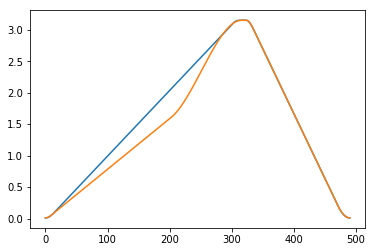

In [2]:
# get original dipole waveform
w1 = r.waveform_get('BO-Fam:MA-B')

# print initial ramp config
print('Initial ramp config')
print('===================')
print('{:<20s}: {} [GeV]'.format('ramp_start_value', r.ramp_start_value))
print('{:<20s}: {} [GeV]'.format('rampup_start_value', r.rampup_start_value))
print('{:<20s}: {} [GeV]'.format('rampup_stop_value', r.rampup_stop_value))
print('{:<20s}: {} [GeV]'.format('ramp_plateau_value', r.ramp_plateau_value))
print()
print('{:<20s}: {} [ms]'.format('rampup_start_time', r.rampup_start_time))
print('{:<20s}: {} [ms]'.format('rampup_stop_time', r.rampup_stop_time))
print('{:<20s}: {} [ms]'.format('rampdown_start_time', r.rampdown_start_time))
print('{:<20s}: {} [ms]'.format('rampdown_stop_time', r.rampdown_stop_time))

# change value of rampup-start
r.rampup_stop_time = r.rampup_stop_time - 100  
r.rampup_stop_value = r.rampup_stop_value - 1.5

# print initial ramp config
print()
print('Final ramp config')
print('===== ===========')
print('{:<20s}: {} [GeV]'.format('ramp_start_value', r.ramp_start_value))
print('{:<20s}: {} [GeV]'.format('rampup_start_value', r.rampup_start_value))
print('{:<20s}: {} [GeV]'.format('rampup_stop_value', r.rampup_stop_value))
print('{:<20s}: {} [GeV]'.format('ramp_plateau_value', r.ramp_plateau_value))
print()
print('{:<20s}: {} [ms]'.format('rampup_start_time', r.rampup_start_time))
print('{:<20s}: {} [ms]'.format('rampup_stop_time', r.rampup_stop_time))
print('{:<20s}: {} [ms]'.format('rampdown_start_time', r.rampdown_start_time))
print('{:<20s}: {} [ms]'.format('rampdown_stop_time', r.rampdown_stop_time))

# get modified dipole waveform
w2 = r.waveform_get('BO-Fam:MA-B')

# compare the two waveforms
print()
print('Waveform comparison: before and after')
plt.plot(w1.times, w1)
plt.plot(w2.times, w2)
plt.show()

In [4]:
w1 = r.waveform_get('BO-Fam:MA-QD')

ValueError: DB for psmodel FAC_DCDC not implemented!